# Dask Tutorial

In [1]:
import pandas as pd
import numpy as np
from math import sqrt
from dask.distributed import Client
from dask.delayed import delayed

To visualize dask diagnosis dashboard

In [2]:
client = Client()
client

Client Scheduler: tcp://127.0.0.1:33569 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 3 Cores: 6 Memory: 20.74 GB


In [3]:
def f(z):
    return sqrt(z+4)

def g(y):
    return y-3

def h(x):
    return x**2

Small examples of delayed functions using the delay decorator. It is useful to parallelize tasks automatically

#### Example 1

In [4]:
x=4

In [5]:
y = delayed(h)(x)
z = delayed(g)(y)
w = delayed(f)(z)

In [6]:
type(w)

dask.delayed.Delayed

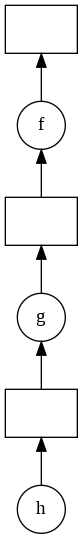

In [7]:
w.visualize(filename='example_1.png')

In [8]:
w.compute()

4.123105625617661

#### Example 2

In [9]:
def inc(x):
    return x + 1

def double(x):
    return x + 2

def add(x, y):
    return x + y

In [11]:
data = [1, 2, 3, 4, 5]

In [12]:
output = []

In [14]:
for x in data:
    a = delayed(inc)(x)
    b = delayed(double)(x)
    c = delayed(add)(a, b)
    output.append(c)

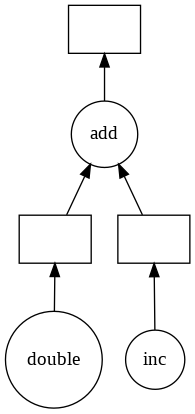

In [16]:
c.visualize(filename='example_2_1.png')

In [18]:
total = delayed(sum)(output)

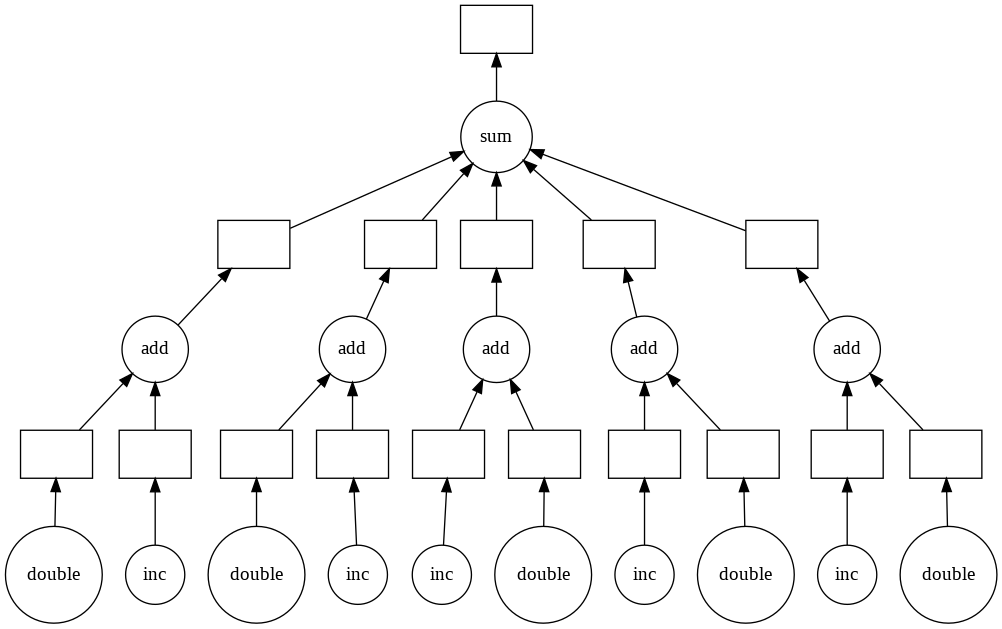

In [19]:
total.visualize(filename='example_2_2.png') 

In [20]:
total.compute()

45

Working with dask arrays

In [23]:
import dask.array as da

In [21]:
import numpy as np

In [22]:
a = np.random.rand(10000)

In [24]:
a_dask = da.from_array(a, chunks=len(a) // 4)

In [25]:
result = a_dask.sum()

In [28]:
result.compute()

4977.317351776792

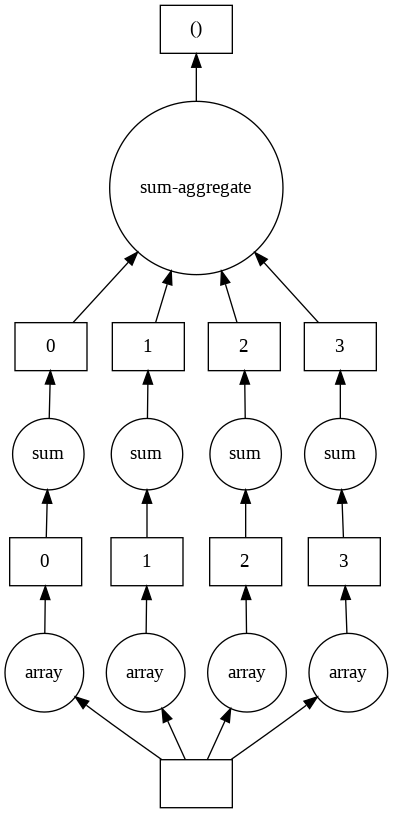

In [29]:
result.visualize(filename='example_3.png')